In [17]:
import kagglehub
import os
import pandas as pd
import string
from collections import defaultdict, Counter
from stemming.porter2 import stem
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import math
import random

path = kagglehub.dataset_download("meshcheriakovilya/fantasy-books")

print("Path to dataset files:", path)

Path to dataset files: /home/bartek/.cache/kagglehub/datasets/meshcheriakovilya/fantasy-books/versions/2


In [18]:
punctuation = string.punctuation + "‘" + "’" + "’" + "…" + "–" + "—" + "“" + "”"
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘’’…–—“”'

In [19]:
def remove_punctuation(input_string):
    result = input_string
    for char in punctuation:
        result = result.replace(char, '')
    return result

In [20]:
stop_words = set("""
i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself 
it its itself they them their theirs themselves what which who whom this that these those am is are was were 
be been being have has had having do does did doing a an the and but if or because as until while of at by for 
with about against between into through during before after above below to from up down in out on off over under 
again further then once here there when where why how all any both each few more most other some such no nor 
not only own same so than too very s t can will just don should now""".split())

In [21]:
files = os.listdir(path)
files

['6_The_Tower_of_the_Swallow_The_Witcher_6_by_Andrzej_Sapkowski.txt',
 'got5.txt',
 'got4.txt',
 'Andrzej_Sapkowski_-_The_Lady_of_the_Lake.txt',
 '4_Baptism_of_Fire_The_Witcher_4_by_Andrzej_Sapkowski.txt',
 'got1.txt',
 'got3.txt',
 'dzhon_ronald_ruel_tolkin-the_lord_of_the_rings.txt',
 '3_The_Time_of_Contempt_The_Witcher_Book_3_by_Sapkowski_Andrzej.txt',
 'got2.txt',
 'Andrzej_Sapkowski_-_The_Last_Wish.txt',
 '2_Blood_of_Elves_The_Witcher_Book_2_by_Sapkowski_Andrzej.txt',
 'Andrzej_Sapkowski_-_Season_of_Storms.txt',
 'dzhon_ronald_ruel_tolkin-the_hobbit.txt',
 '5_Sword_of_Destiny_The_Witcher_5_by_Andrzej_Sapkowski.txt']

Zapisano wynik do 6_The_Tower_of_the_Swallow_The_Witcher_6_by_Andrzej_Sapkowski_word_frequencies.txt


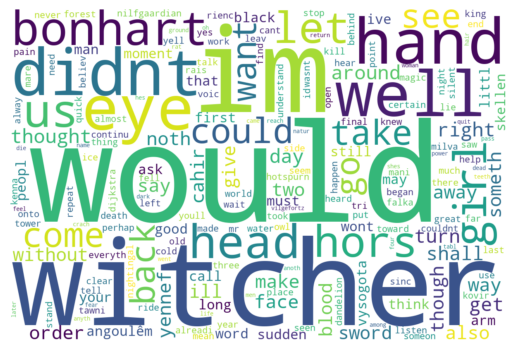

In [22]:
# for file in files:
file = files[0]

input_file = path + "/" + file
output_file = file[:-4]  + "_word_frequencies.txt"
with open(input_file, "r", encoding="utf-8", errors="ignore") as f:
    text = f.read()

text = text.lower()
# print(text)
text = remove_punctuation(text)
words = text.split()

filtered_words = [w for w in words if w not in stop_words]
filtered_words = [stem(w) for w in filtered_words]

counter = Counter(filtered_words)
pairs = list(counter.items())
pairs.sort(key=lambda x: x[1], reverse=True)

# remove first 10 most common words
filtered_pairs = pairs[10:]

with open(output_file, "w", encoding="utf-8") as f:
    for word, count in filtered_pairs:
        f.write(f"{word} {count}\n")
print(f"Zapisano wynik do {output_file}")

# create dictionary {word: number}
freq_dict = dict(filtered_pairs)

# generate cloud
wordcloud = WordCloud(width=1200, height=800, background_color="white").generate_from_frequencies(freq_dict)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Zapisano wynik do 6_The_Tower_of_the_Swallow_The_Witcher_6_by_Andrzej_Sapkowski_word_frequencies.txt
Zapisano wynik do got5_word_frequencies.txt
Zapisano wynik do got4_word_frequencies.txt
Zapisano wynik do Andrzej_Sapkowski_-_The_Lady_of_the_Lake_word_frequencies.txt
Zapisano wynik do 4_Baptism_of_Fire_The_Witcher_4_by_Andrzej_Sapkowski_word_frequencies.txt
Zapisano wynik do got1_word_frequencies.txt
Zapisano wynik do got3_word_frequencies.txt
Zapisano wynik do dzhon_ronald_ruel_tolkin-the_lord_of_the_rings_word_frequencies.txt
Zapisano wynik do 3_The_Time_of_Contempt_The_Witcher_Book_3_by_Sapkowski_Andrzej_word_frequencies.txt
Zapisano wynik do got2_word_frequencies.txt
Zapisano wynik do Andrzej_Sapkowski_-_The_Last_Wish_word_frequencies.txt
Zapisano wynik do 2_Blood_of_Elves_The_Witcher_Book_2_by_Sapkowski_Andrzej_word_frequencies.txt
Zapisano wynik do Andrzej_Sapkowski_-_Season_of_Storms_word_frequencies.txt
Zapisano wynik do dzhon_ronald_ruel_tolkin-the_hobbit_word_frequencies.txt

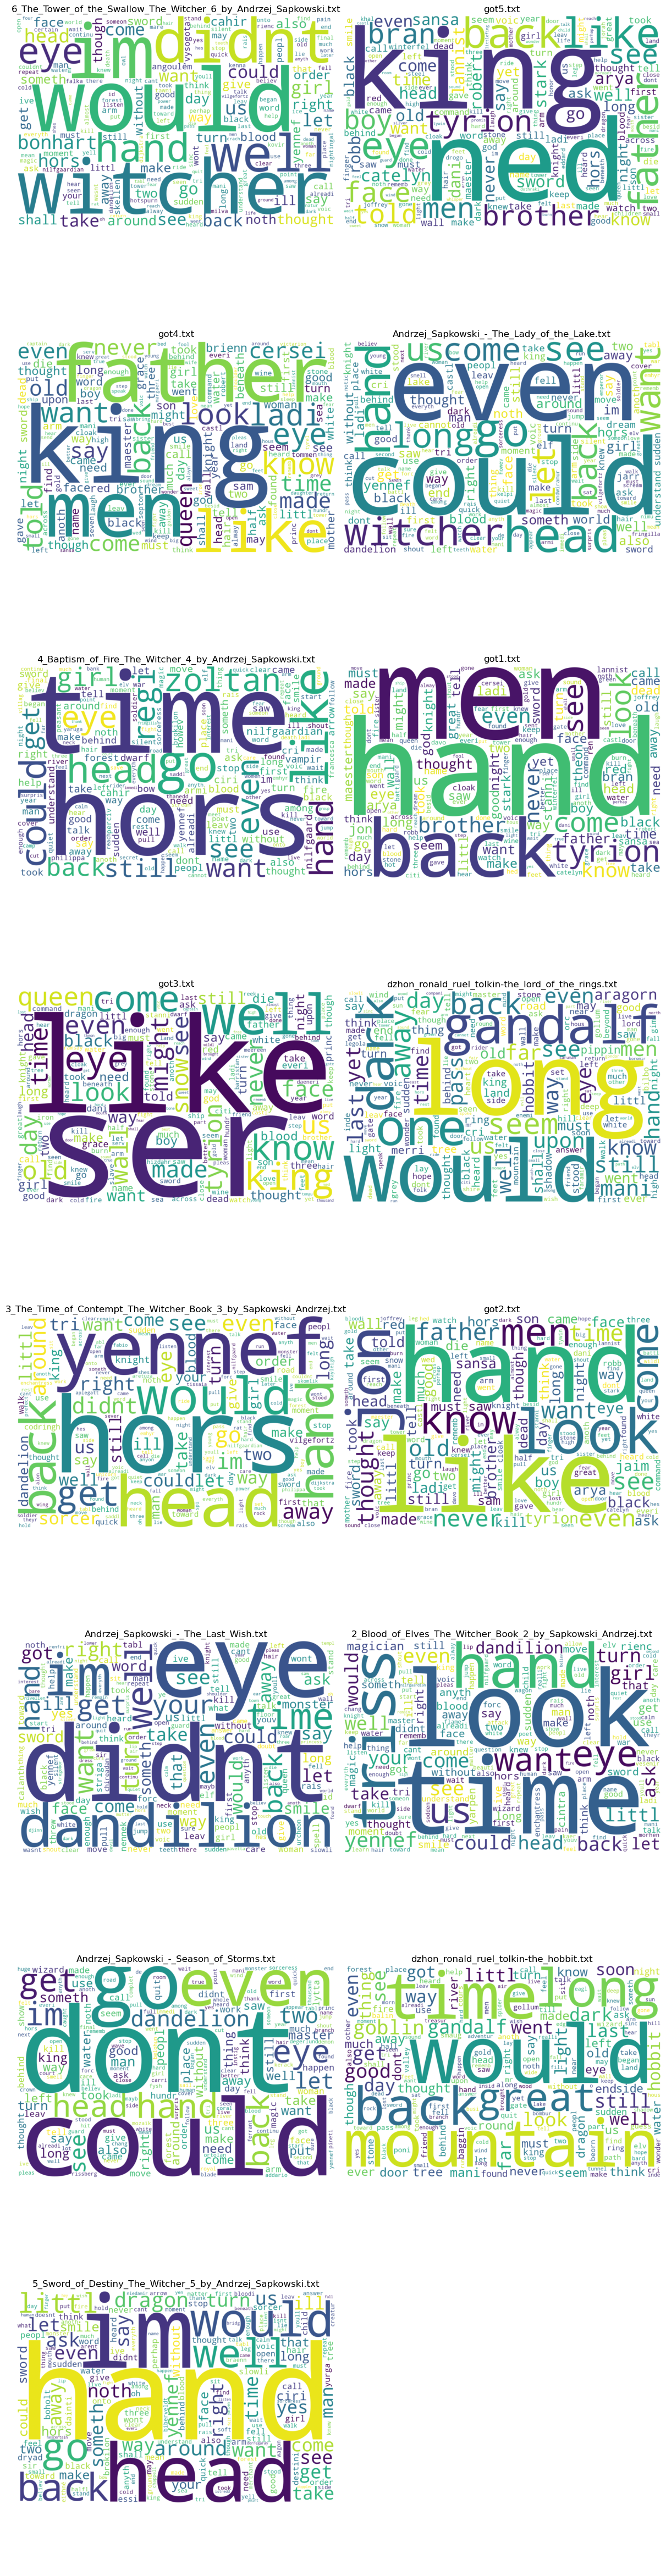

In [30]:
n = len(files)
cols = 2  # how many columns you want
rows = (n + cols - 1) // cols  # calculate rows automatically

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

# flatten axes for easy iteration
axes = axes.flatten()

for i, file in enumerate(files):
    input_file = path + "/" + file
    output_file = file[:-4] + "_word_frequencies.txt"

    with open(input_file, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read()

    text = text.lower()
    text = remove_punctuation(text)
    words = text.split()

    filtered_words = [w for w in words if w not in stop_words]
    filtered_words = [stem(w) for w in filtered_words]

    counter = Counter(filtered_words)
    pairs = list(counter.items())
    pairs.sort(key=lambda x: x[1], reverse=True)

    filtered_pairs = pairs[10:]

    with open(output_file, "w", encoding="utf-8") as f:
        for word, count in filtered_pairs:
            f.write(f"{word} {count}\n")
    print(f"Zapisano wynik do {output_file}")

    freq_dict = dict(filtered_pairs)
    wordcloud = WordCloud(width=1200, height=800, background_color="white").generate_from_frequencies(freq_dict)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(file, fontsize=12)
    axes[i].axis("off")

# hide any unused subplot slots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Zadanie 6

In [24]:
matches = [(m.start(), m.end()) for m in re.finditer(r"\n{5,}", text)]
print(matches)

[(630918, 630924), (631708, 631714), (644154, 644160)]


Liczba rozdziałów: 8


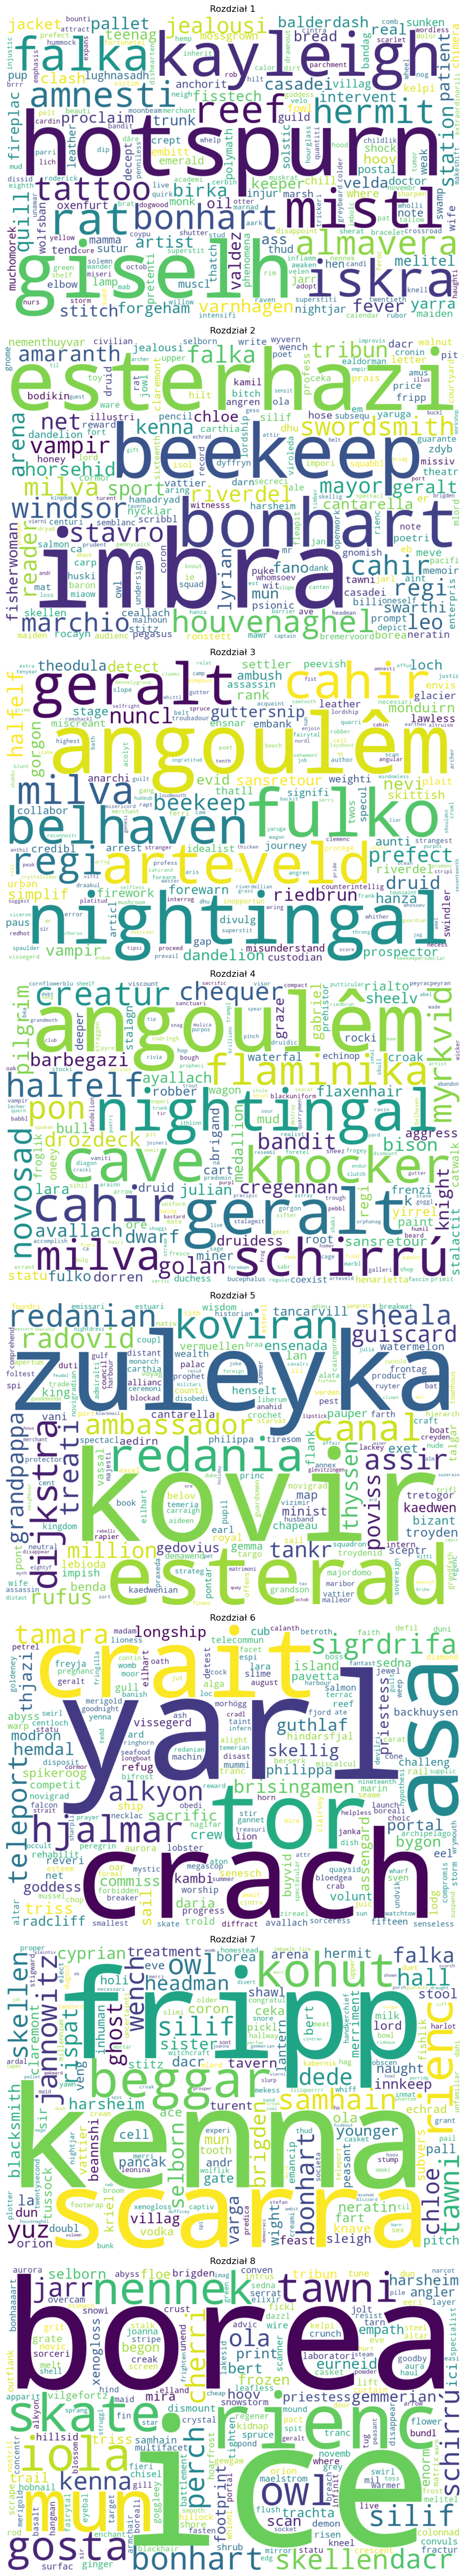

In [25]:
file = files[0]
input_file = path + "/" + file

with open(input_file, "r", encoding="utf-8", errors="ignore") as f:
    text = f.read()

chapters = re.split(r"(?:\n\s*){5,}", text)  
chapters = [c.strip() for c in chapters if c.strip()]

print(f"Liczba rozdziałów: {len(chapters)}")

docs_tokens = []
for chapter in chapters:
    chapter = chapter.lower()
    chapter = remove_punctuation(chapter)
    words = chapter.split()
    filtered_words = [w for w in words if w not in stop_words]
    filtered_words = [stem(w) for w in filtered_words]
    docs_tokens.append(filtered_words)

tf_list = [Counter(doc) for doc in docs_tokens]

N = len(docs_tokens)
all_terms = set([w for doc in docs_tokens for w in doc])
idf = {}
for term in all_terms:
    df = sum(1 for doc in docs_tokens if term in doc)
    idf[term] = math.log(N / (1 + df))

tfidf_list = []
for tf in tf_list:
    doc_tfidf = {term: tf[term] * idf[term] for term in tf}
    tfidf_list.append(doc_tfidf)

rows = len(tfidf_list)
fig, axes = plt.subplots(rows, 1, figsize=(12, 6 * rows))

if rows == 1:
    axes = [axes]

for i, doc_tfidf in enumerate(tfidf_list):
    wc = WordCloud(width=1200, height=800, background_color="white")
    wc.generate_from_frequencies(doc_tfidf)
    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].set_title(f"Rozdział {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()



Zadanie 7

In [26]:
def where2read(word, tfidf_list):
    results = []
    for i, tfidf_dict in enumerate(tfidf_list, start=1):
        doc_name = f"rozdzial{i}"
        weight = tfidf_dict.get(word, 0)
        results.append((doc_name, weight))
    results.sort(key=lambda x: x[1], reverse=True)
    return results

In [27]:
where2read("geralt", tfidf_list)

[('rozdzial4', 46.6044957371885),
 ('rozdzial3', 18.123970564462194),
 ('rozdzial2', 10.35655460826411),
 ('rozdzial6', 2.8768207245178083),
 ('rozdzial8', 1.4384103622589042),
 ('rozdzial1', 0),
 ('rozdzial5', 0),
 ('rozdzial7', 0)]

Zadanie 8

In [36]:
def build_bigrams(words, stop_words, top_k=5):
    followers = defaultdict(list)

    for i in range(len(words)-1):
        w1, w2 = words[i], words[i+1]
        if w1 in stop_words or w2 in stop_words:
            continue
        followers[w1].append(w2)

    top_followers = {}
    for word, nexts in followers.items():
        counter = Counter(nexts)
        top_followers[word] = [w for w, _ in counter.most_common(top_k)]

    return top_followers

def generate_paragraph(followers, length=50):
    word = random.choice(list(followers.keys()))
    result = [word]

    for _ in range(length-1):
        if word not in followers or not followers[word]:
            word = random.choice(list(followers.keys()))
            
        else:
            word = random.choice(followers[word])  
        result.append(word)

    return " ".join(result)

In [37]:
followers = build_bigrams(filtered_words, stop_words, top_k=5)

for i in range(0,5):
    paragraph = generate_paragraph(followers, length=80)
    print(paragraph)
    print("\n\n\n")

whalebon ribbon adorn silver flower breez nearbi tavern becom centurion halberdi said slowli slowli well see go away get work battleax lute pluck string lute string test call im sorri wont abl tell stori vengerberg swore soft look eye littl eye said slowli slowli walk away purs receiv client whatev right said soft sure dracolizard forktail redania mention poet said cold blue pearl oyster arent cold well let get away geralt rivia im talk boholt call geralt said soft sure




tasteless merchant look eye fix ground look back hand sword hand head away toss wet willowgreen hair held beanpol interject gloomili would come agreement dont think im go way around geralt witcher ask someth els ran narrow gold band black white hors well see go away toss wet fog duén canel eh werelynx live longer way around neck yennef said slowli toward door open eye said slowli toward geralt witcher sir geralt rivia one know witcher geralt dandelion yell run




elven speech rogu use call poppet call geralt witche